# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.085111e+01     6.659169e+00
 * time: 0.006163120269775391
     1     3.065642e+01     5.815984e+00
 * time: 0.0186769962310791
     2     2.743477e+01     9.783617e+00
 * time: 0.04872298240661621
     3     2.183874e+01     6.813626e+00
 * time: 0.2085411548614502
     4     1.936642e+01     6.543384e+00
 * time: 0.24114012718200684
     5     1.282622e+01     1.270494e+00
 * time: 0.2752659320831299
     6     1.124682e+01     1.170119e+00
 * time: 0.30211305618286133
     7     1.061572e+01     1.351481e+00
 * time: 0.32379913330078125
     8     1.024958e+01     8.690988e-01
 * time: 0.34523606300354004
     9     9.996097e+00     5.253878e-01
 * time: 0.36714792251586914
    10     9.789461e+00     7.542329e-01
 * time: 0.39055395126342773
    11     9.623904e+00     6.111899e-01
 * time: 0.41310715675354004
    12     9.482637e+00     5.282026e-01
 * time: 0.43660402297973633
    13     9.428753e+00     8.145993e-01
 * time: 0

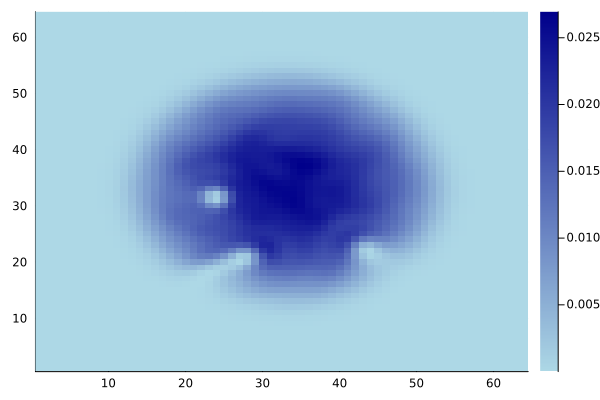

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)